# <center> Sales prediction</center>
---


Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter


sns.set_theme(style="whitegrid")

Loading datasets

In [3]:
# Getting urls from drive
test_url='https://drive.google.com/file/d/1voPMZ-66QbUHHO6XR53TCan6emWFPfBB/view?usp=sharing'
test_url2='https://drive.google.com/uc?id=' + test_url.split('/')[-2]

shops_url = 'https://drive.google.com/file/d/1L_vHYXH_JPqB5cwvDD0tyb7XBSLYy_IZ/view?usp=sharing'
shops_url2='https://drive.google.com/uc?id=' + shops_url.split('/')[-2]

train_url = 'https://drive.google.com/file/d/1yIpuw-YaV2i0zq86hFjoe_xnv33dNH6e/view?usp=sharing'
train_url2='https://drive.google.com/uc?id=' + train_url.split('/')[-2]

items = 'https://drive.google.com/file/d/1VgEsLxOJoa7LK8VWkCFmvbwVtDo1awPg/view?usp=sharing'
items2='https://drive.google.com/uc?id=' + items.split('/')[-2]

item_categories_url = 'https://drive.google.com/file/d/10d0c83jQBp3IlW6inlH6IkiUKV4wEf3_/view?usp=sharing'
item_categories_url2='https://drive.google.com/uc?id=' + item_categories_url.split('/')[-2]

# Reading csv files
test = pd.read_csv(test_url2)
train = pd.read_csv(train_url2)
shops = pd.read_csv(shops_url2)
items = pd.read_csv(items2)
item_categories = pd.read_csv(item_categories_url2)

In [4]:
dfs = {'Test': test, 'Train': train, 'Shops': shops, 'Items': items, 'Item_Categories': item_categories} # Dict of dataframes

## <center> Datasets analysis: <center>

### Basic information:
- NaN values
- Types
- Unique values

In [5]:
for k, v in dfs.items():
    print(k)
    display(v.head(5))

Test


ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

Train


date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

Shops


shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

Items


item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

Item_Categories


item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

Checking NaN values

In [6]:
for k, v in dfs.items():
    print('\n', k)
    display(v.isnull().sum())


 Test


ID         0
shop_id    0
item_id    0
dtype: int64


 Train


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


 Shops


shop_name    0
shop_id      0
dtype: int64


 Items


item_name           0
item_id             0
item_category_id    0
dtype: int64


 Item_Categories


item_category_name    0
item_category_id      0
dtype: int64

Checking data types

In [7]:
for k, v in dfs.items():
    print('\n', k)
    dtypes = v.dtypes
    display(dtypes)


 Test


ID         int64
shop_id    int64
item_id    int64
dtype: object


 Train


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


 Shops


shop_name    object
shop_id       int64
dtype: object


 Items


item_name           object
item_id              int64
item_category_id     int64
dtype: object


 Item_Categories


item_category_name    object
item_category_id       int64
dtype: object

Unique values:

In [8]:
for k, v in dfs.items():
    print('\n', k)
    display(v.nunique())


 Test


ID         214200
shop_id        42
item_id      5100
dtype: int64


 Train


date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64


 Shops


shop_name    60
shop_id      60
dtype: int64


 Items


item_name           22170
item_id             22170
item_category_id       84
dtype: int64


 Item_Categories


item_category_name    84
item_category_id      84
dtype: int64

### Merging datasets:

These datasets contain all the information in separated tables. Let's merge them and create new complex dataset

In [9]:
train_items = pd.merge(train, items, how='inner', on='item_id')
train_complete1 = pd.merge(train_items, item_categories, how='inner', on='item_category_id')
train_complete = train_complete1.drop(columns=['item_name', 'item_category_name']) # All merged in this variable. We don't need names for analysis

display(train_complete)

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154       999.0   
1        23.01.2013               0       24    22154       999.0   
2        20.01.2013               0       27    22154       999.0   
3        02.01.2013               0       25    22154       999.0   
4        03.01.2013               0       25    22154       999.0   
...             ...             ...      ...      ...         ...   
2935844  22.10.2015              33       55    13093       250.0   
2935845  21.09.2015              32       55    13091      1000.0   
2935846  16.09.2015              32       55    13094      2500.0   
2935847  22.09.2015              32       55    13094      2500.0   
2935848  26.10.2015              33       55    13092      2000.0   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                37  
2                 1.0                37  
3                 1.0                37  
4                 1.0                37  
...               ...               ...  
2935844           1.0                36  
2935845           1.0                36  
2935846           1.0                36  
2935847           2.0                36  
2935848           1.0                36  

[2935849 rows x 7 columns]

### Dataset visualization

Modifying date type to datatime

In [10]:
train_complete['date'] = pd.to_datetime(train_complete['date']) # Change date column to pandas date time
train_complete

date  date_block_num  shop_id  item_id  item_price  \
0       2013-02-01               0       59    22154       999.0   
1       2013-01-23               0       24    22154       999.0   
2       2013-01-20               0       27    22154       999.0   
3       2013-02-01               0       25    22154       999.0   
4       2013-03-01               0       25    22154       999.0   
...            ...             ...      ...      ...         ...   
2935844 2015-10-22              33       55    13093       250.0   
2935845 2015-09-21              32       55    13091      1000.0   
2935846 2015-09-16              32       55    13094      2500.0   
2935847 2015-09-22              32       55    13094      2500.0   
2935848 2015-10-26              33       55    13092      2000.0   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                37  
2                 1.0                37  
3                 1.0                37  
4                 1.0                37  
...               ...               ...  
2935844           1.0                36  
2935845           1.0                36  
2935846           1.0                36  
2935847           2.0                36  
2935848           1.0                36  

[2935849 rows x 7 columns]

#### Top 10 items sold | by total items & price

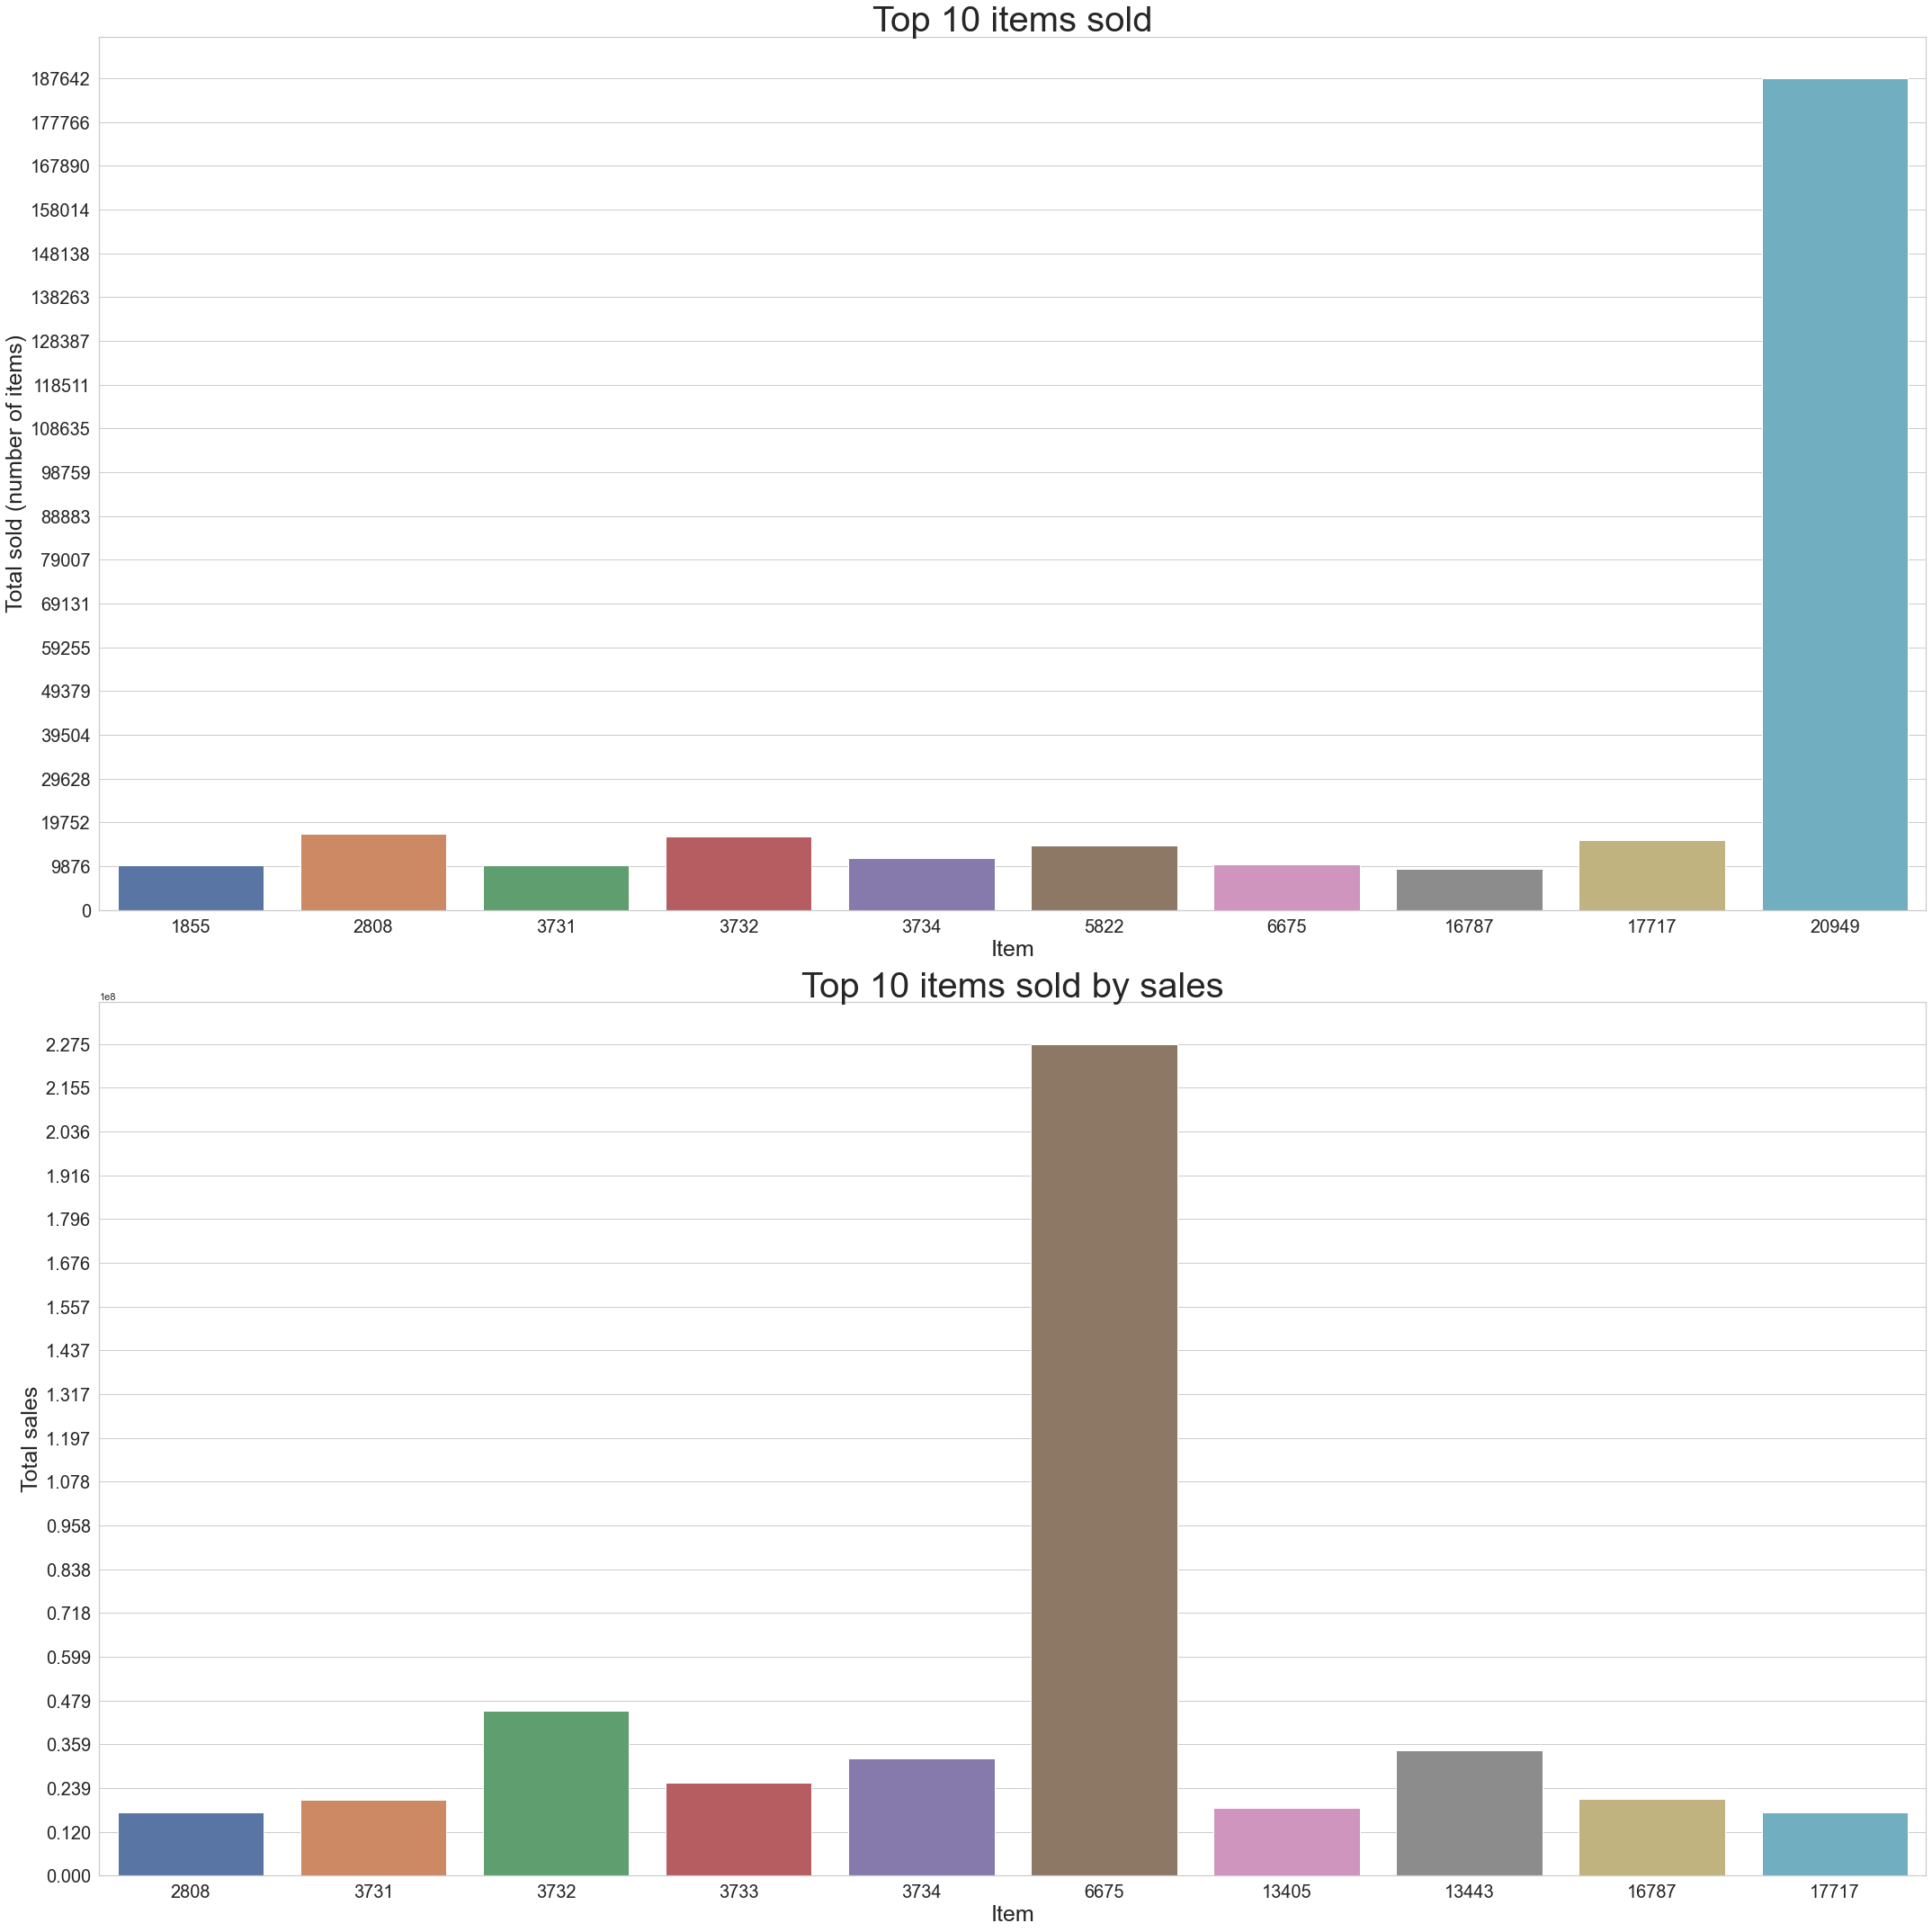

In [11]:
top_items = train_complete.groupby(['item_id'], as_index = False).agg({'item_cnt_day': 'sum', 'item_price' : 'mean'})
top_items['total_sales'] = top_items['item_price'] * top_items['item_cnt_day'] # Adding total sales: item sold * item price

sortby_nitems = top_items.sort_values(by = ['item_cnt_day'], ascending = False).head(10) # Order by number of items sold
sortby_price = top_items.sort_values(by = ['total_sales'], ascending = False).head(10) # Order by total sales (item sold * item price)

fig, ax = plt.subplots(2, figsize = (30, 30))

g_nitems = sns.barplot(
    data = sortby_nitems,
    x = 'item_id',
    y = 'item_cnt_day',
    label='Total items sold',
    ax=ax[0])

ax[0].set_xlabel('Item', fontsize=25)
ax[0].set_ylabel('Total sold (number of items)', fontsize=25)
ax[0].set_title('Top 10 items sold', fontsize = 40)
ax[0].set_yticks(np.linspace(0, sortby_nitems['item_cnt_day'].max(), 20))
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)



g_price = sns.barplot(
    data = sortby_price,
    x = 'item_id',
    y = 'total_sales',
    label='Total items sold',
    ax=ax[1])

ax[1].set_xlabel('Item', fontsize=25)
ax[1].set_ylabel('Total sales', fontsize=25)
ax[1].set_title('Top 10 items sold by sales', fontsize = 40)
ax[1].set_yticks(np.linspace(0, sortby_price['total_sales'].max(), 20))
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)


plt.tight_layout()
plt.show()
plt.close()

#### Top 10 categories sold | by total items & price

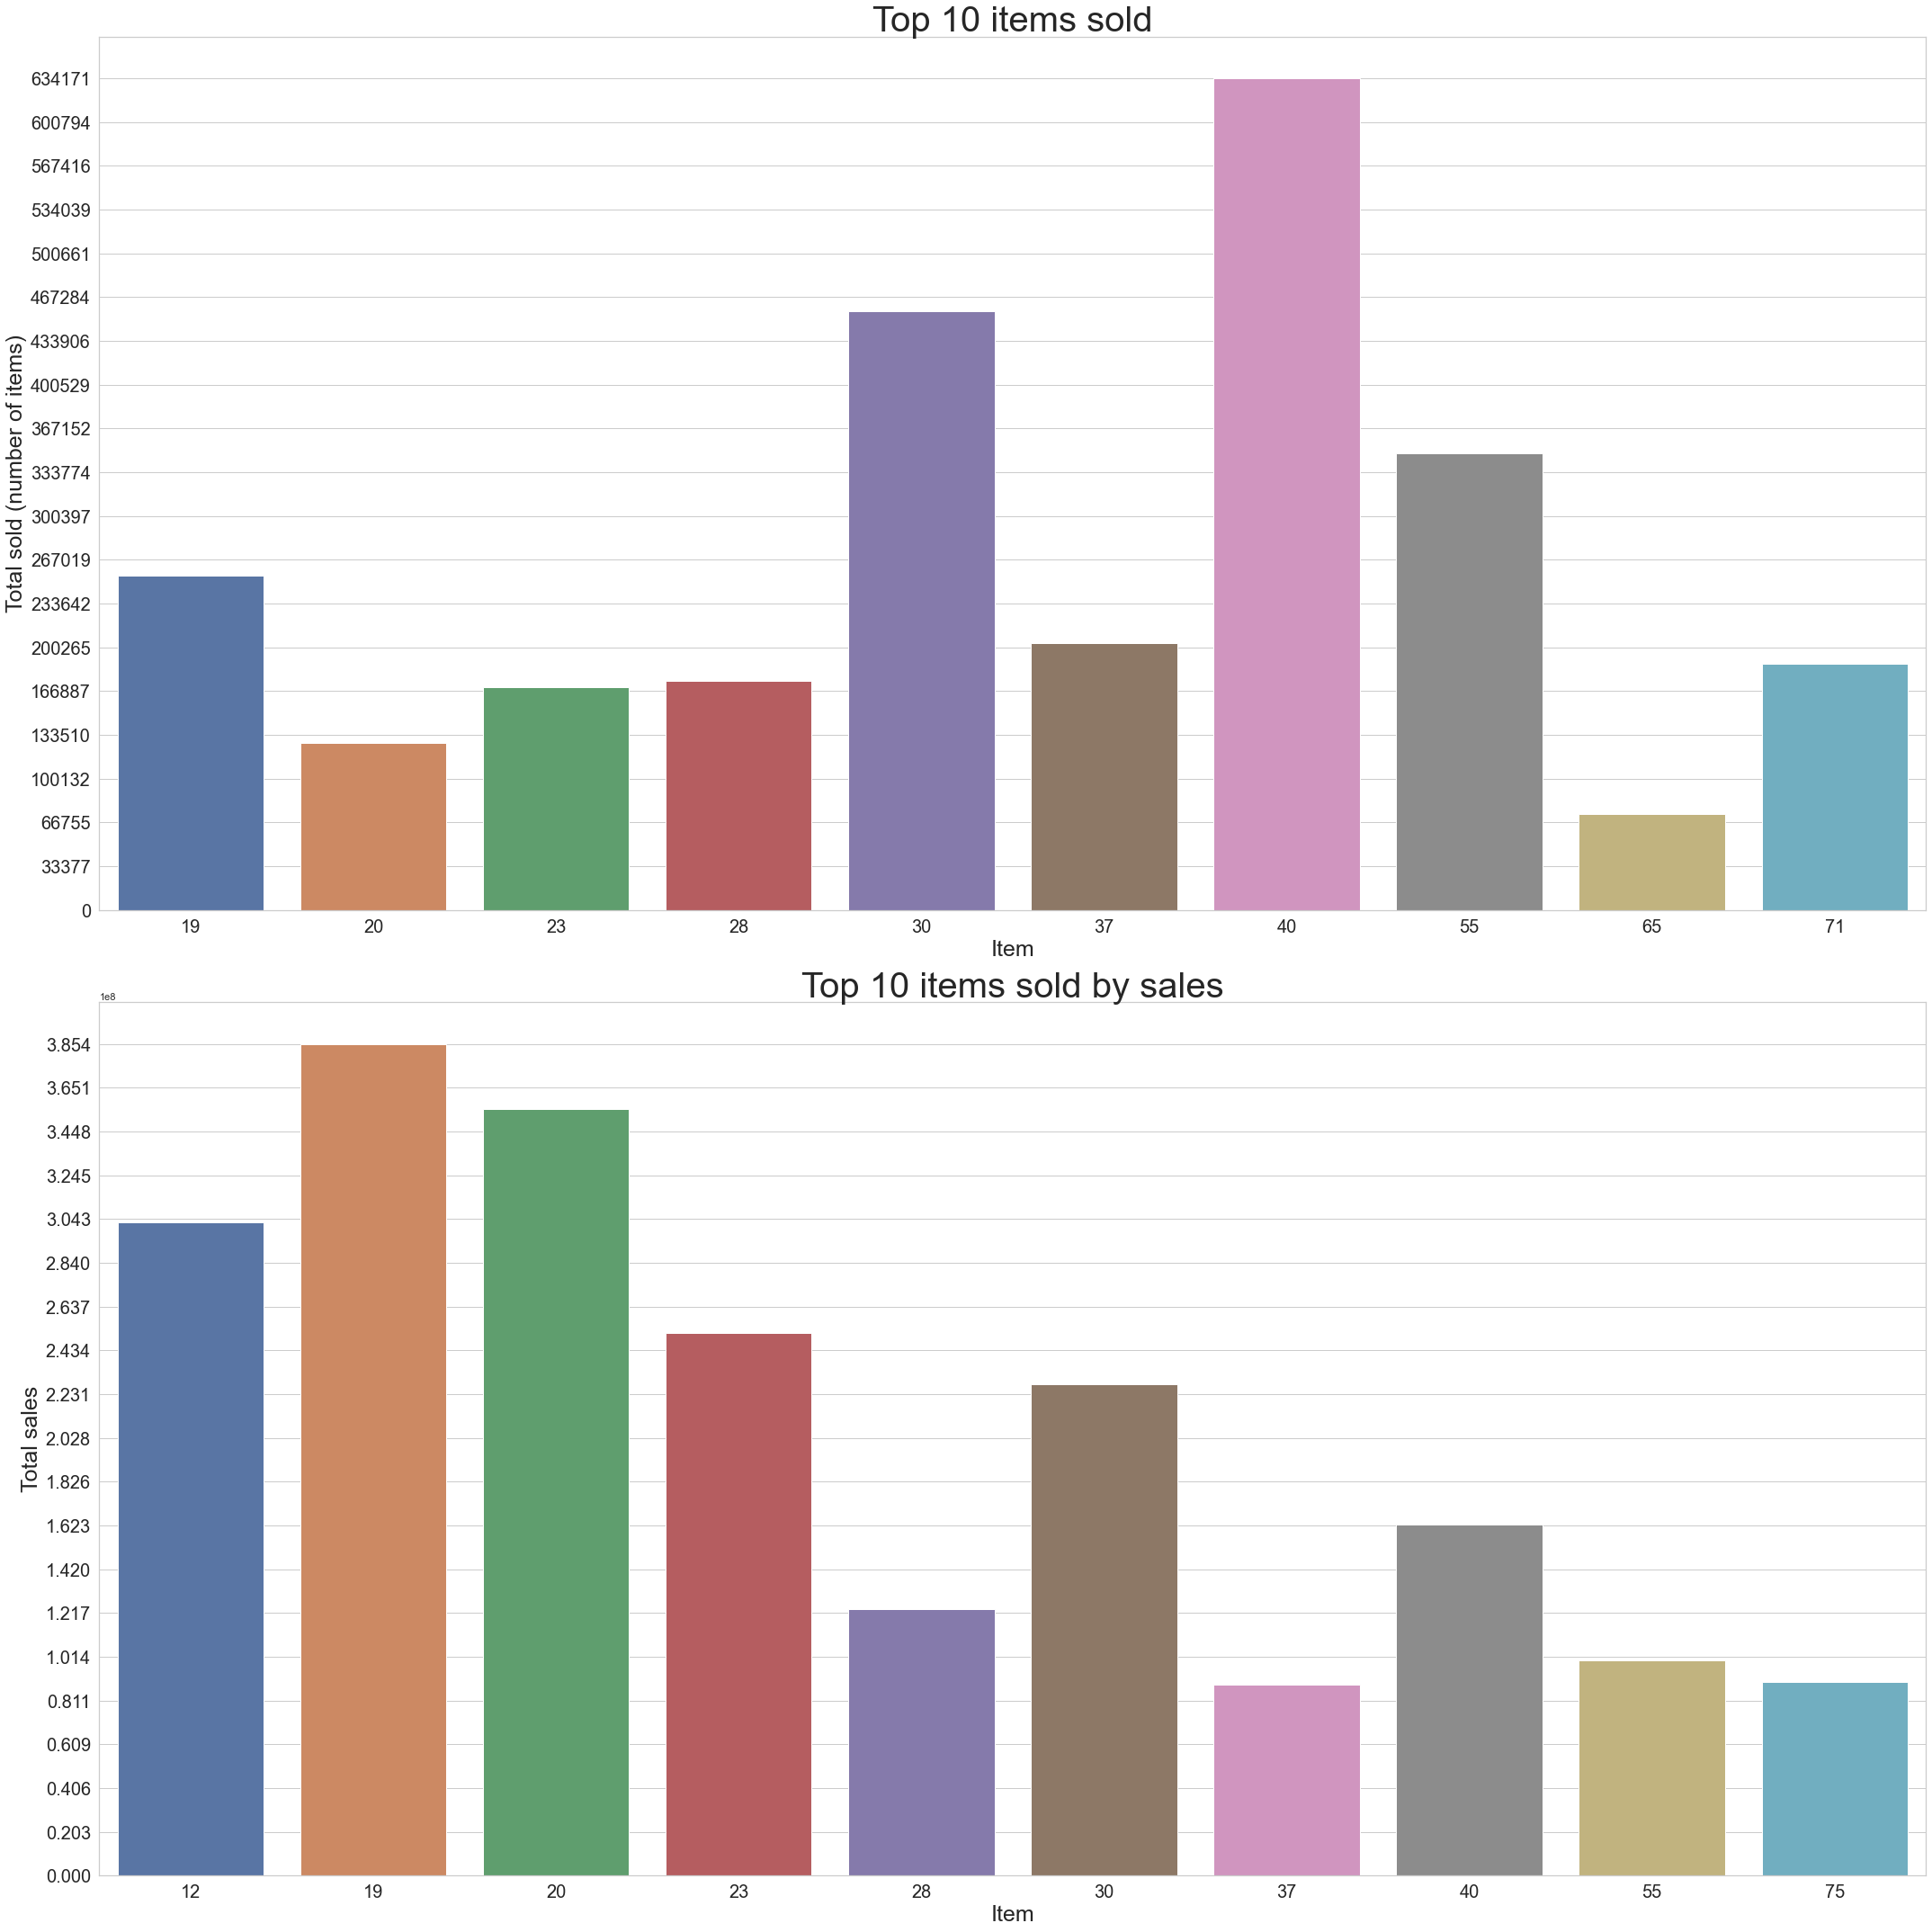

item_category_id  item_cnt_day   item_price   total_sales
0                40      634171.0   256.339150  1.625629e+08
1                30      456540.0   499.199532  2.279046e+08
2                55      348591.0   286.209370  9.977001e+07
3                19      254887.0  1512.044319  3.854004e+08
4                37      203284.0   434.289667  8.828414e+07
5                71      187998.0     4.931371  9.270879e+05
6                28      174954.0   706.798395  1.236572e+08
7                23      169944.0  1479.293863  2.513971e+08
8                20      127319.0  2791.779820  3.554466e+08
9                65       73077.0   359.641506  2.628152e+07

In [12]:
top_categories = train_complete.groupby(['item_category_id'], as_index = False).agg({'item_cnt_day' : 'sum', 'item_price' : 'mean'})
top_categories['total_sales'] = top_categories['item_price'] * top_categories['item_cnt_day'] # Adding total sales: item sold * item price

sortby_ncategories = top_categories.sort_values(by = ['item_cnt_day'], ascending = False).reset_index(drop=True).head(10) # Order by number of items sold
sortby_price_cat = top_categories.sort_values(by = ['total_sales'], ascending = False).reset_index(drop=True).head(10) # Order by total sales (item sold * item price)

fig, ax = plt.subplots(2, figsize = (30, 30))

g_nitems = sns.barplot(
    data = sortby_ncategories,
    x = 'item_category_id',
    y = 'item_cnt_day',
    label = 'Total items sold',
    ax = ax[0])

ax[0].set_xlabel('Item', fontsize=25)
ax[0].set_ylabel('Total sold (number of items)', fontsize=25)
ax[0].set_title('Top 10 items sold', fontsize = 40)
ax[0].set_yticks(np.linspace(0, sortby_ncategories['item_cnt_day'].max(), 20))
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)


g_price = sns.barplot(
    data = sortby_price_cat,
    x = 'item_category_id',
    y = 'total_sales',
    label='Total items sold',
    ax = ax[1])

ax[1].set_xlabel('Item', fontsize=25)
ax[1].set_ylabel('Total sales', fontsize=25)
ax[1].set_title('Top 10 items sold by sales', fontsize = 40)
ax[1].set_yticks(np.linspace(0, sortby_price_cat['total_sales'].max(), 20))
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)


plt.tight_layout()
plt.show()
plt.close()

display(sortby_ncategories.head(10))

#### Number of items per category

#### Number of categories per shop

#### Total items & Total sales | By Shop

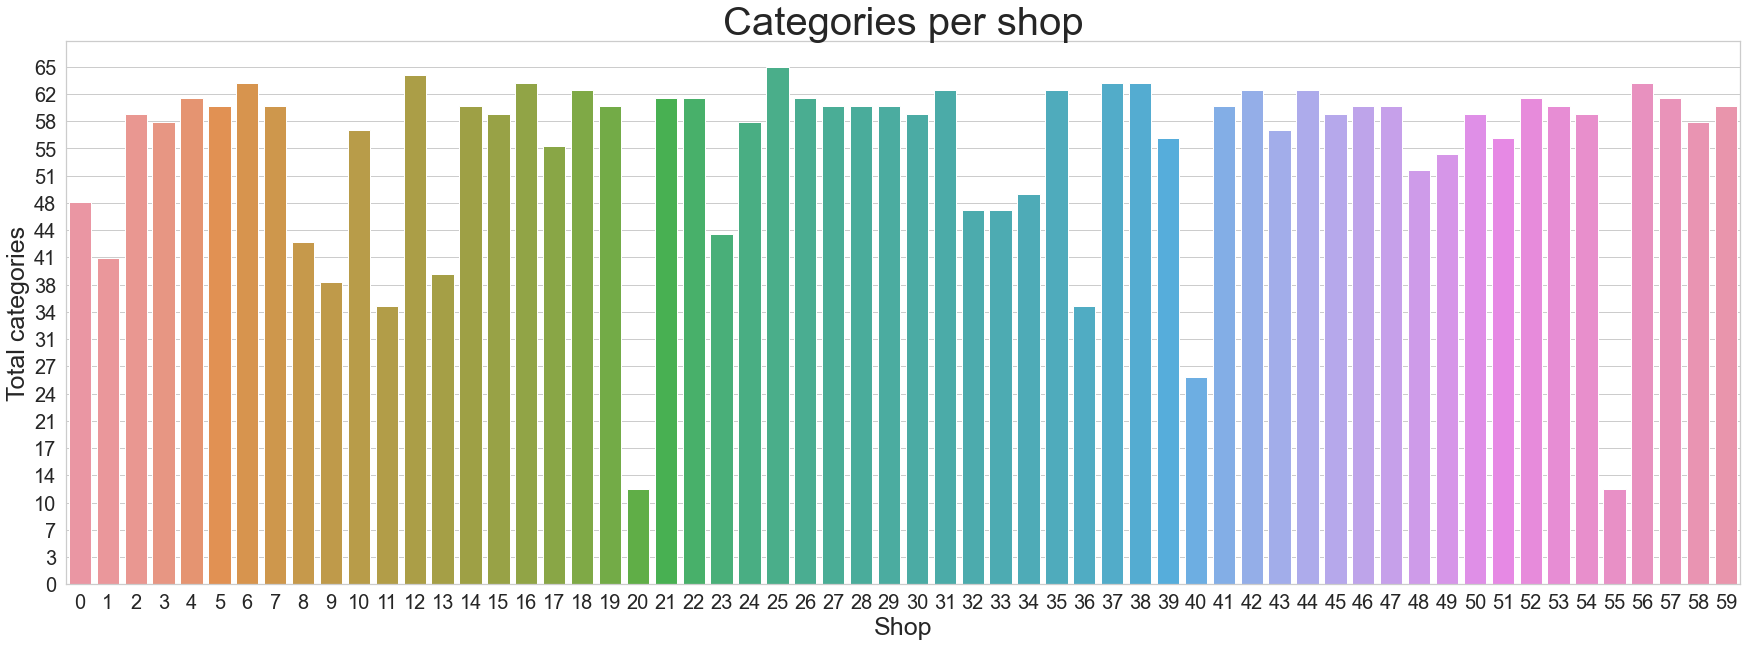

In [14]:
shop_total_sold = train_complete.groupby('shop_id', as_index=False).agg({'item_cnt_day': 'sum'})

shop_total_item = train_complete.groupby('shop_id', as_index=False).agg({'item_id': 'count'})

fig, ax = plt.subplots(figsize = (30, 10))

ax = sns.barplot(
    data = shop_total_sold,
    x = 'shop_id',
    y = 'item_cnt_day',
    label='Total items sold',
    color = 'yellowgreen')

ax = sns.barplot(
    data = shop_total_item,
    x = 'shop_id',
    y = 'item_id',
    color = 'salmon',
    label = 'Total diffrent items',)

ax.set_xlabel('Shop', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per shop', fontsize = 40)
ax.set_yticks(np.linspace(0, shop_total_sold['item_cnt_day'].max(), 20))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.legend()

plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='32')

plt.show()
plt.close()

#### Total sales per year & month

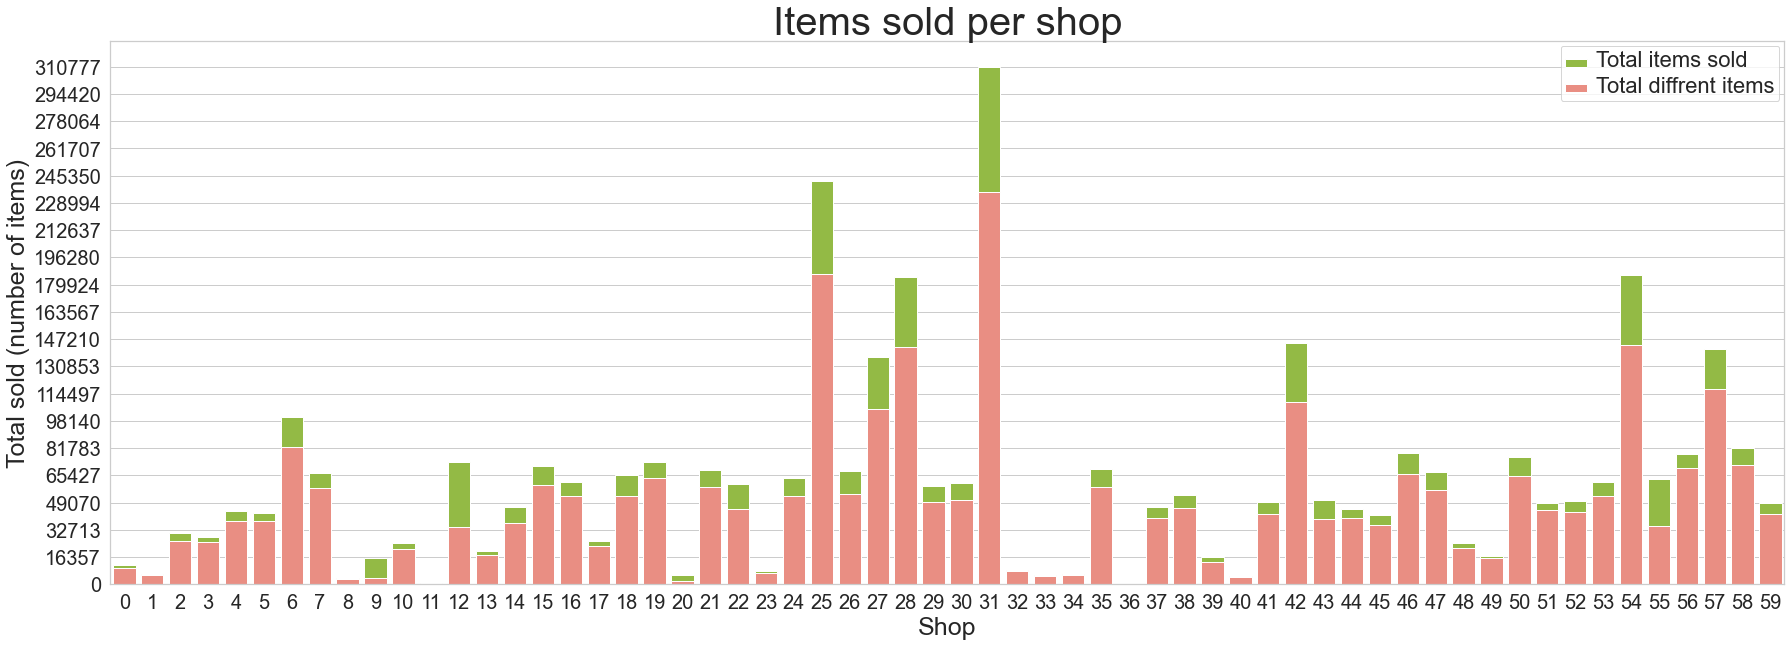

In [15]:
sells_year = train_complete.groupby(train_complete['date'].dt.year).agg({'item_cnt_day': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize = (20, 10))

ax = sns.barplot(
    data = sells_year,
    x = 'date',
    y = 'item_cnt_day'
)

ax.set_xlabel('Year', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per year', fontsize = 40)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()
plt.close()

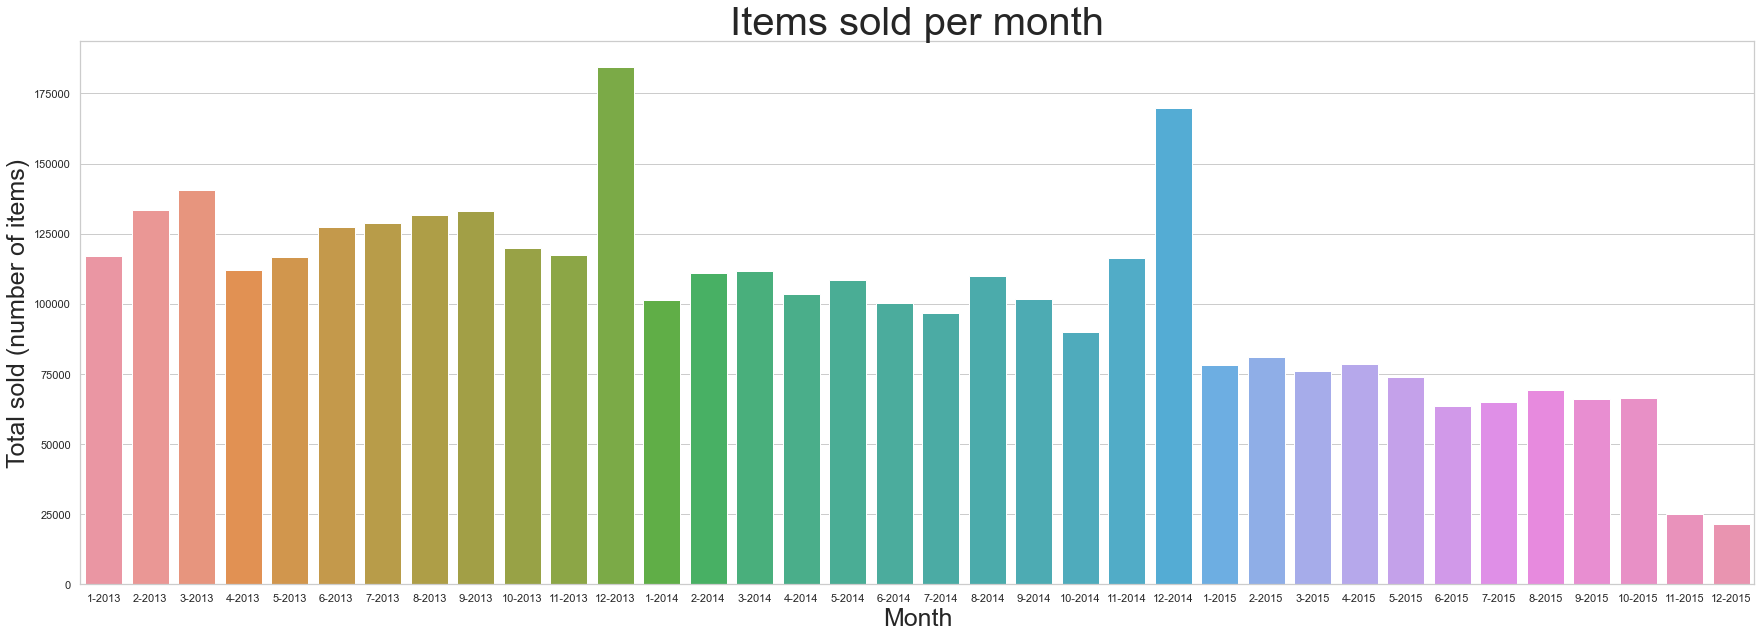

In [151]:
sells_month = train_complete.groupby([train_complete.date.dt.year.rename('year'), train_complete.date.dt.month.rename('month')]).agg({'item_cnt_day': 'sum'}).reset_index()

sells_month['date'] = sells_month['month'].astype(str) + '-' +  sells_month['year'].astype(str)
sells_month = sells_month.drop(['month', 'year'], axis = 1)

fig, ax = plt.subplots(figsize = (30, 10))

ax = sns.barplot(
    data = sells_month,
    x = 'date',
    y = 'item_cnt_day'
)

ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per month', fontsize = 40)
ax.tick_params(axis='x', labelsize=20, rotation = 40)
ax.tick_params(axis='y', labelsize=20)

plt.show()
plt.close()

#### Items sold per shop | By month & year

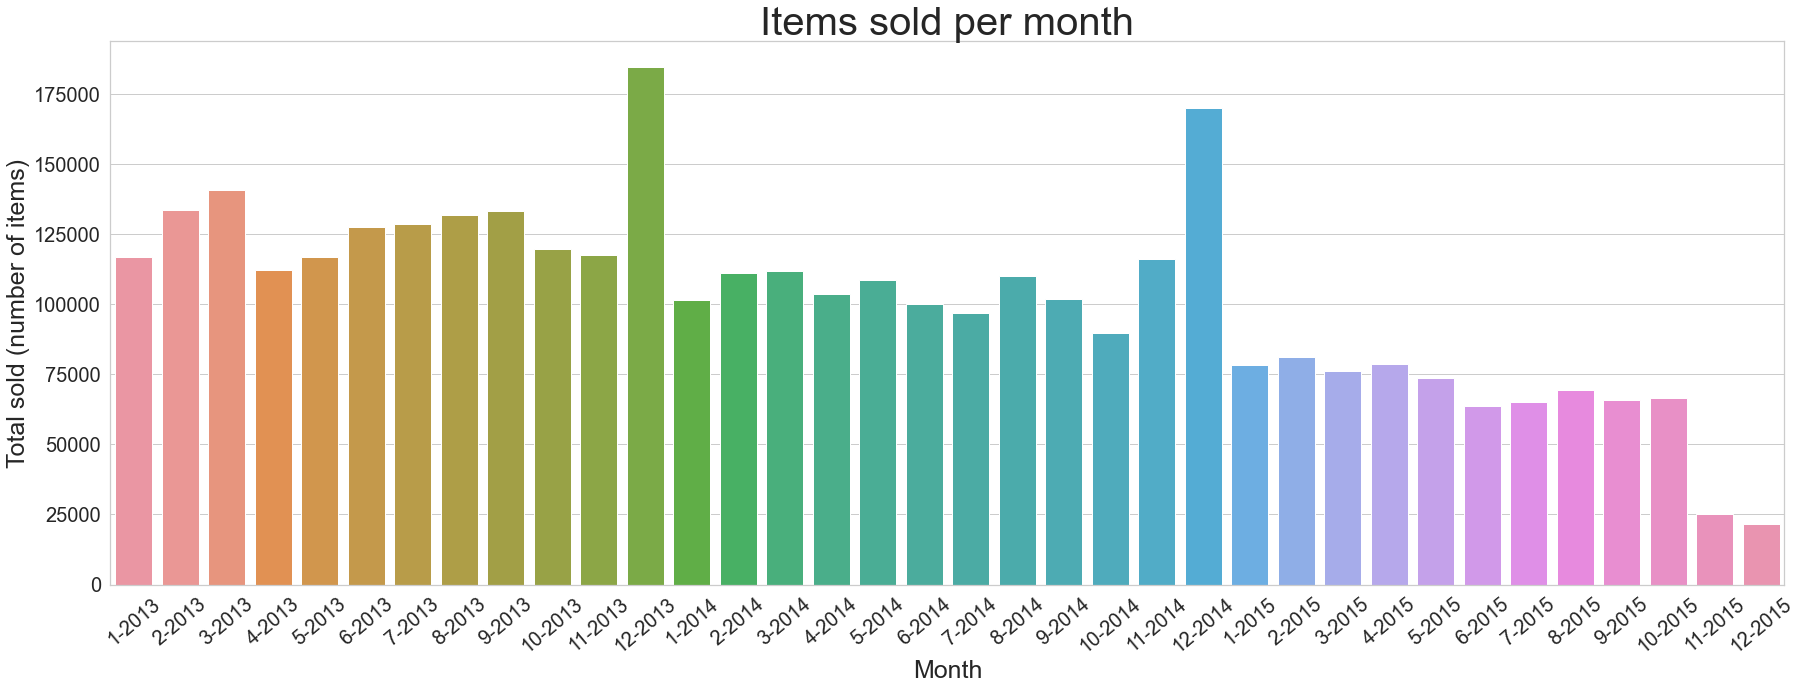

In [17]:
items_sold_month = train_complete.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_month.head(10))

draw_it(items_sold_month, 'date_block_num', 'item_cnt_day', 'Month', 'Items sold per month by shop', 'shop_id')

There is a lot of shops that didn't have any values for some months. Let's fill out these rows with '0' items sold:

##### For the next sections these function will be used:

In [78]:
def draw_it(data, x, y, xlabel, title, col):
    """
    This function draws a the lineplot of 'data'
    """
    fig, ax = plt.subplots(figsize = (30, 50))

    ax = sns.lineplot(
        data=data,
        palette='tab10',
        x = x,
        y = y,
        hue = col,
        style = col,
        linewidth=2.5)

    ax.set_xlabel(xlabel, fontsize=25)
    ax.set_ylabel('Total sold (number of items)', fontsize=25)
    ax.set_title(title, fontsize = 40)
    ax.set_xticks(data[x].values)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    plt.setp(ax.get_legend().get_texts(), fontsize='22')
    plt.setp(ax.get_legend().get_title(), fontsize='32')

    fig.tight_layout()
    plt.show()
    plt.close()

In [68]:
def fill_empty_dates(olddf, col, dates):
    """
    Return a new df where all 'uniques' values got a 0 in 'item_cnt_day' for all missing 'date_block_num' rows
    """
    newdf = olddf.copy()
    for date in newdf[dates].unique():
        for element in newdf[col].unique():
            if not(((newdf[dates] == date) & (newdf[col] == element)).any()):
                new_row = {dates:date, col:element, 'item_cnt_day':0}
                newdf = newdf.append(new_row, ignore_index=True)
    return newdf

##### By month

In [ ]:
items_sold_month_2 = fill_empty_dates(items_sold_month, 'shop_id', 'date_block_num')

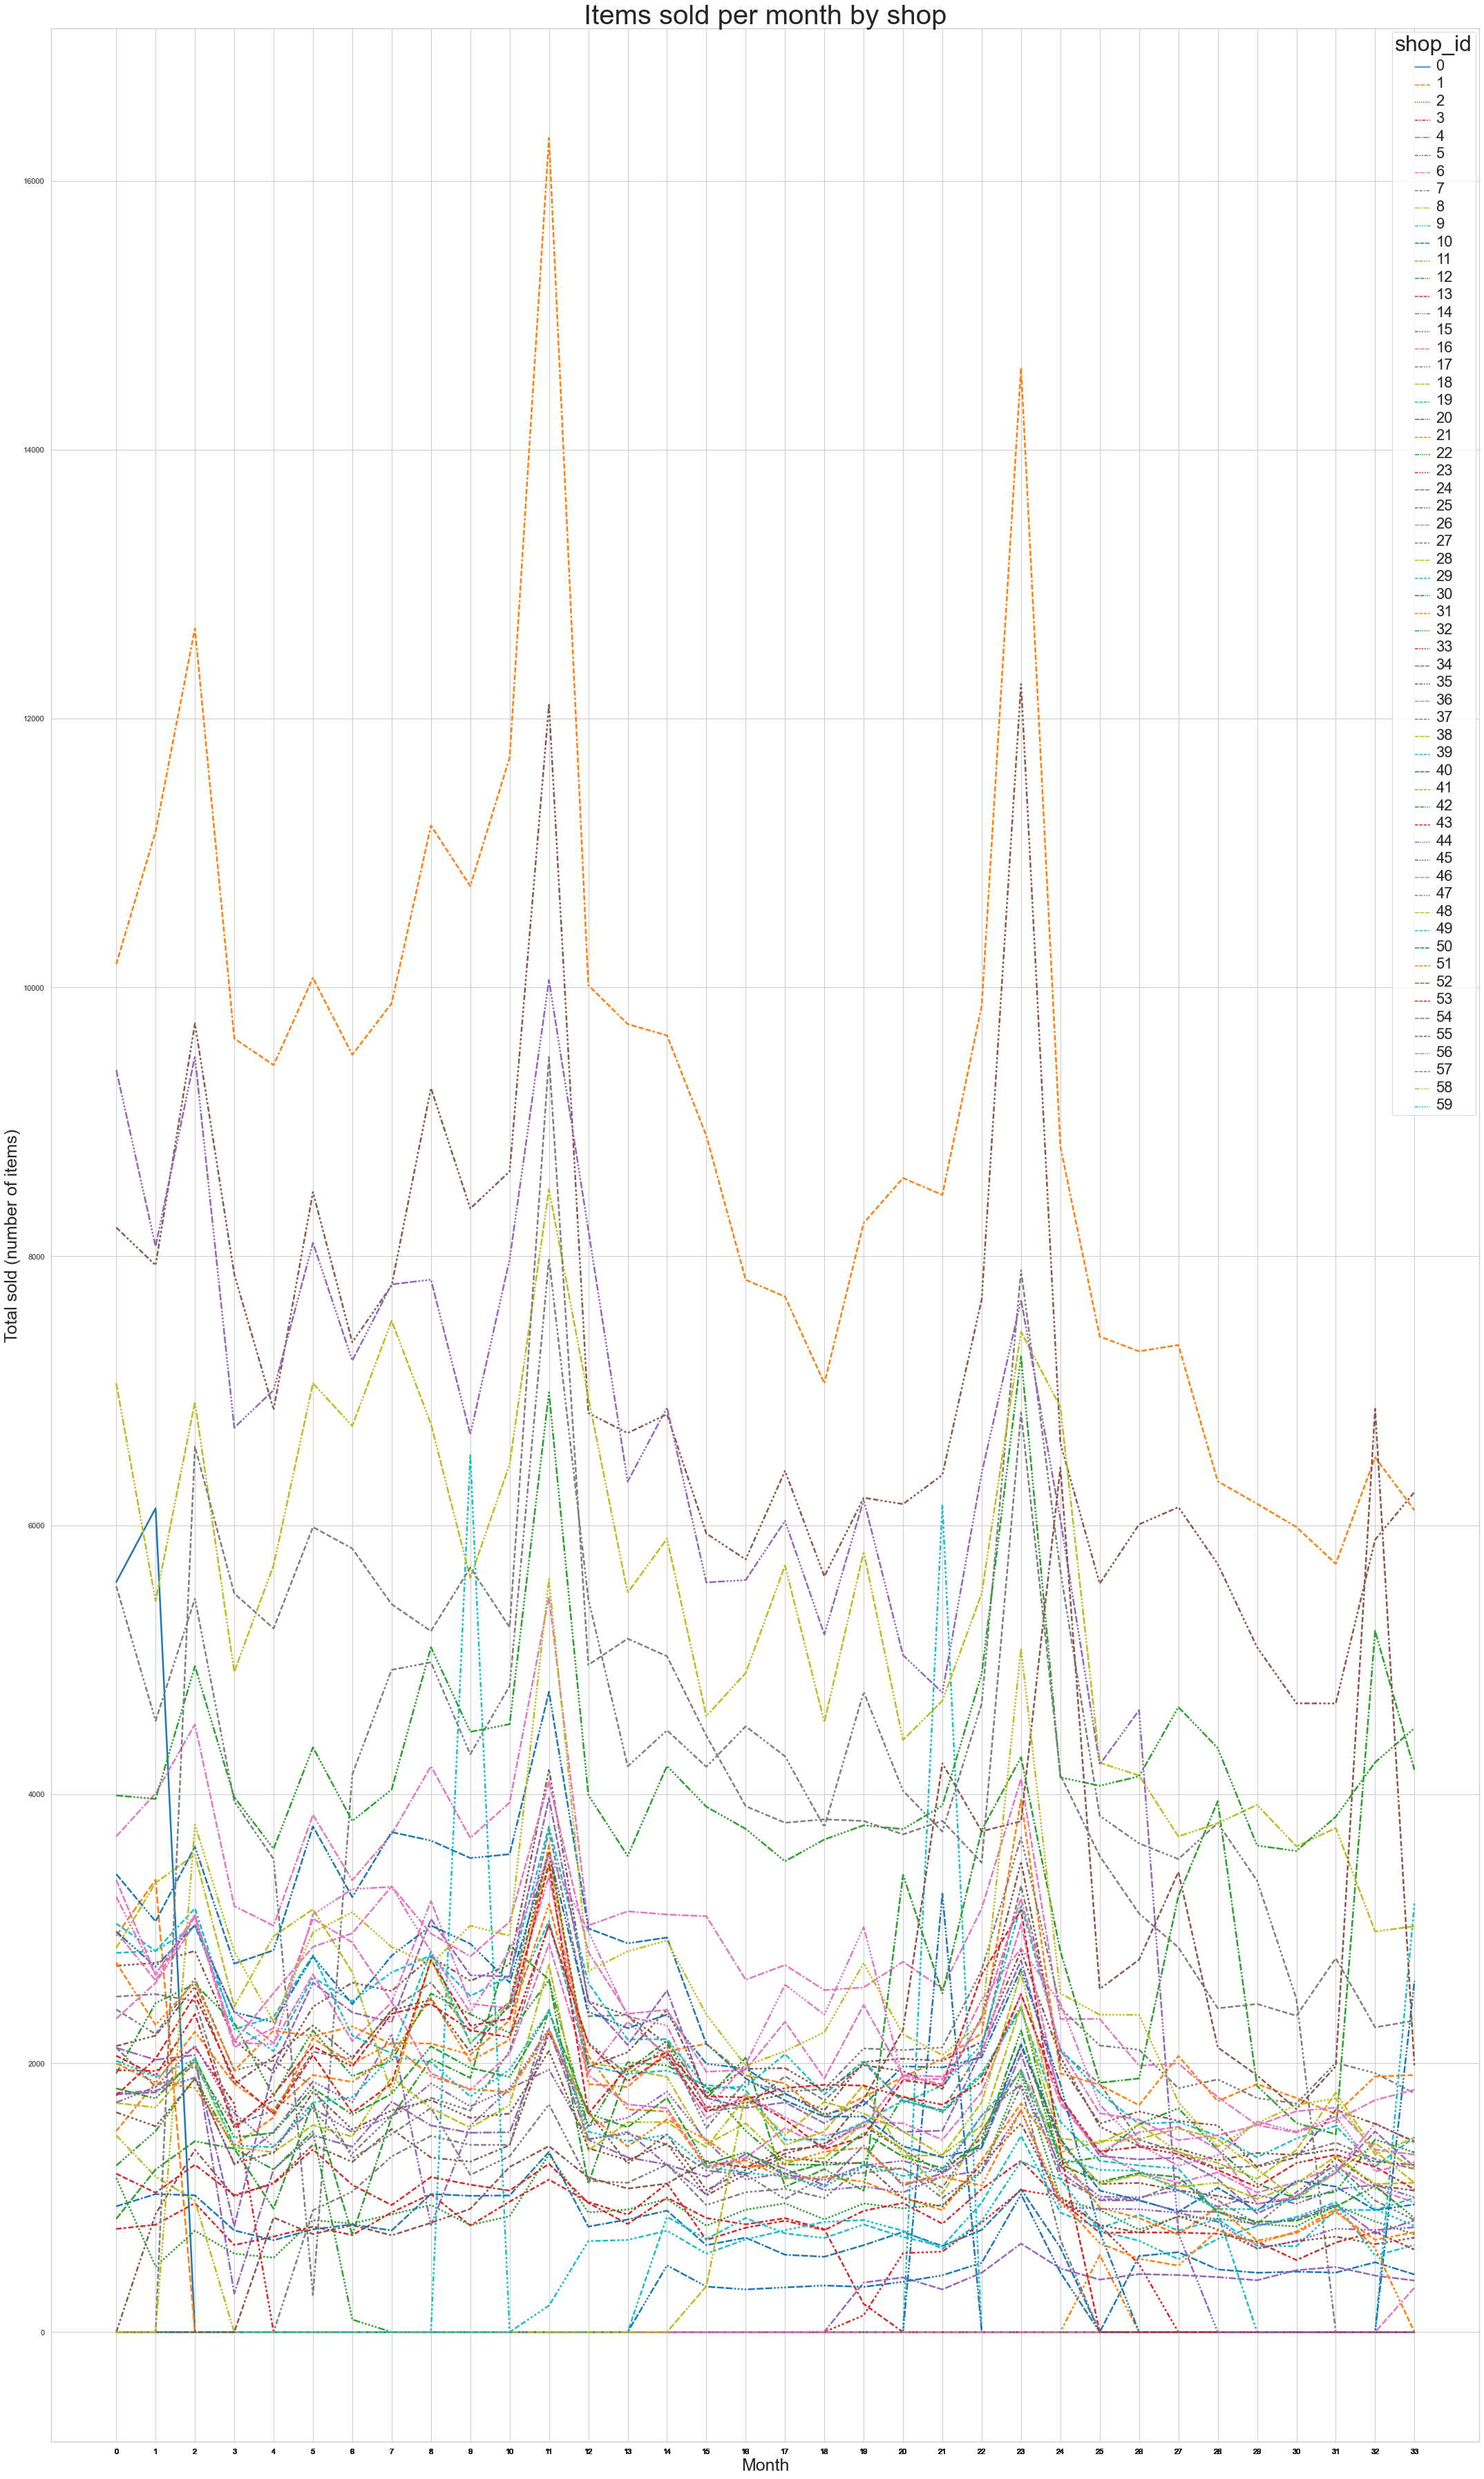

In [154]:
draw_it(items_sold_month_2, 'date_block_num', 'item_cnt_day', 'Month', 'Items sold per month by shop', 'shop_id')

In [69]:
items_sold_year = train_complete.groupby([train_complete['date'].dt.year, 'shop_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_year.head(10))

draw_it(items_sold_year, 'date', 'item_cnt_day', 'Year', 'Items sold per year by shop', 'shop_id')

Let's do the same with unexisted values for some years

##### By year

In [ ]:
items_sold_year_2 = fill_empty_dates(items_sold_year, 'shop_id', 'date')

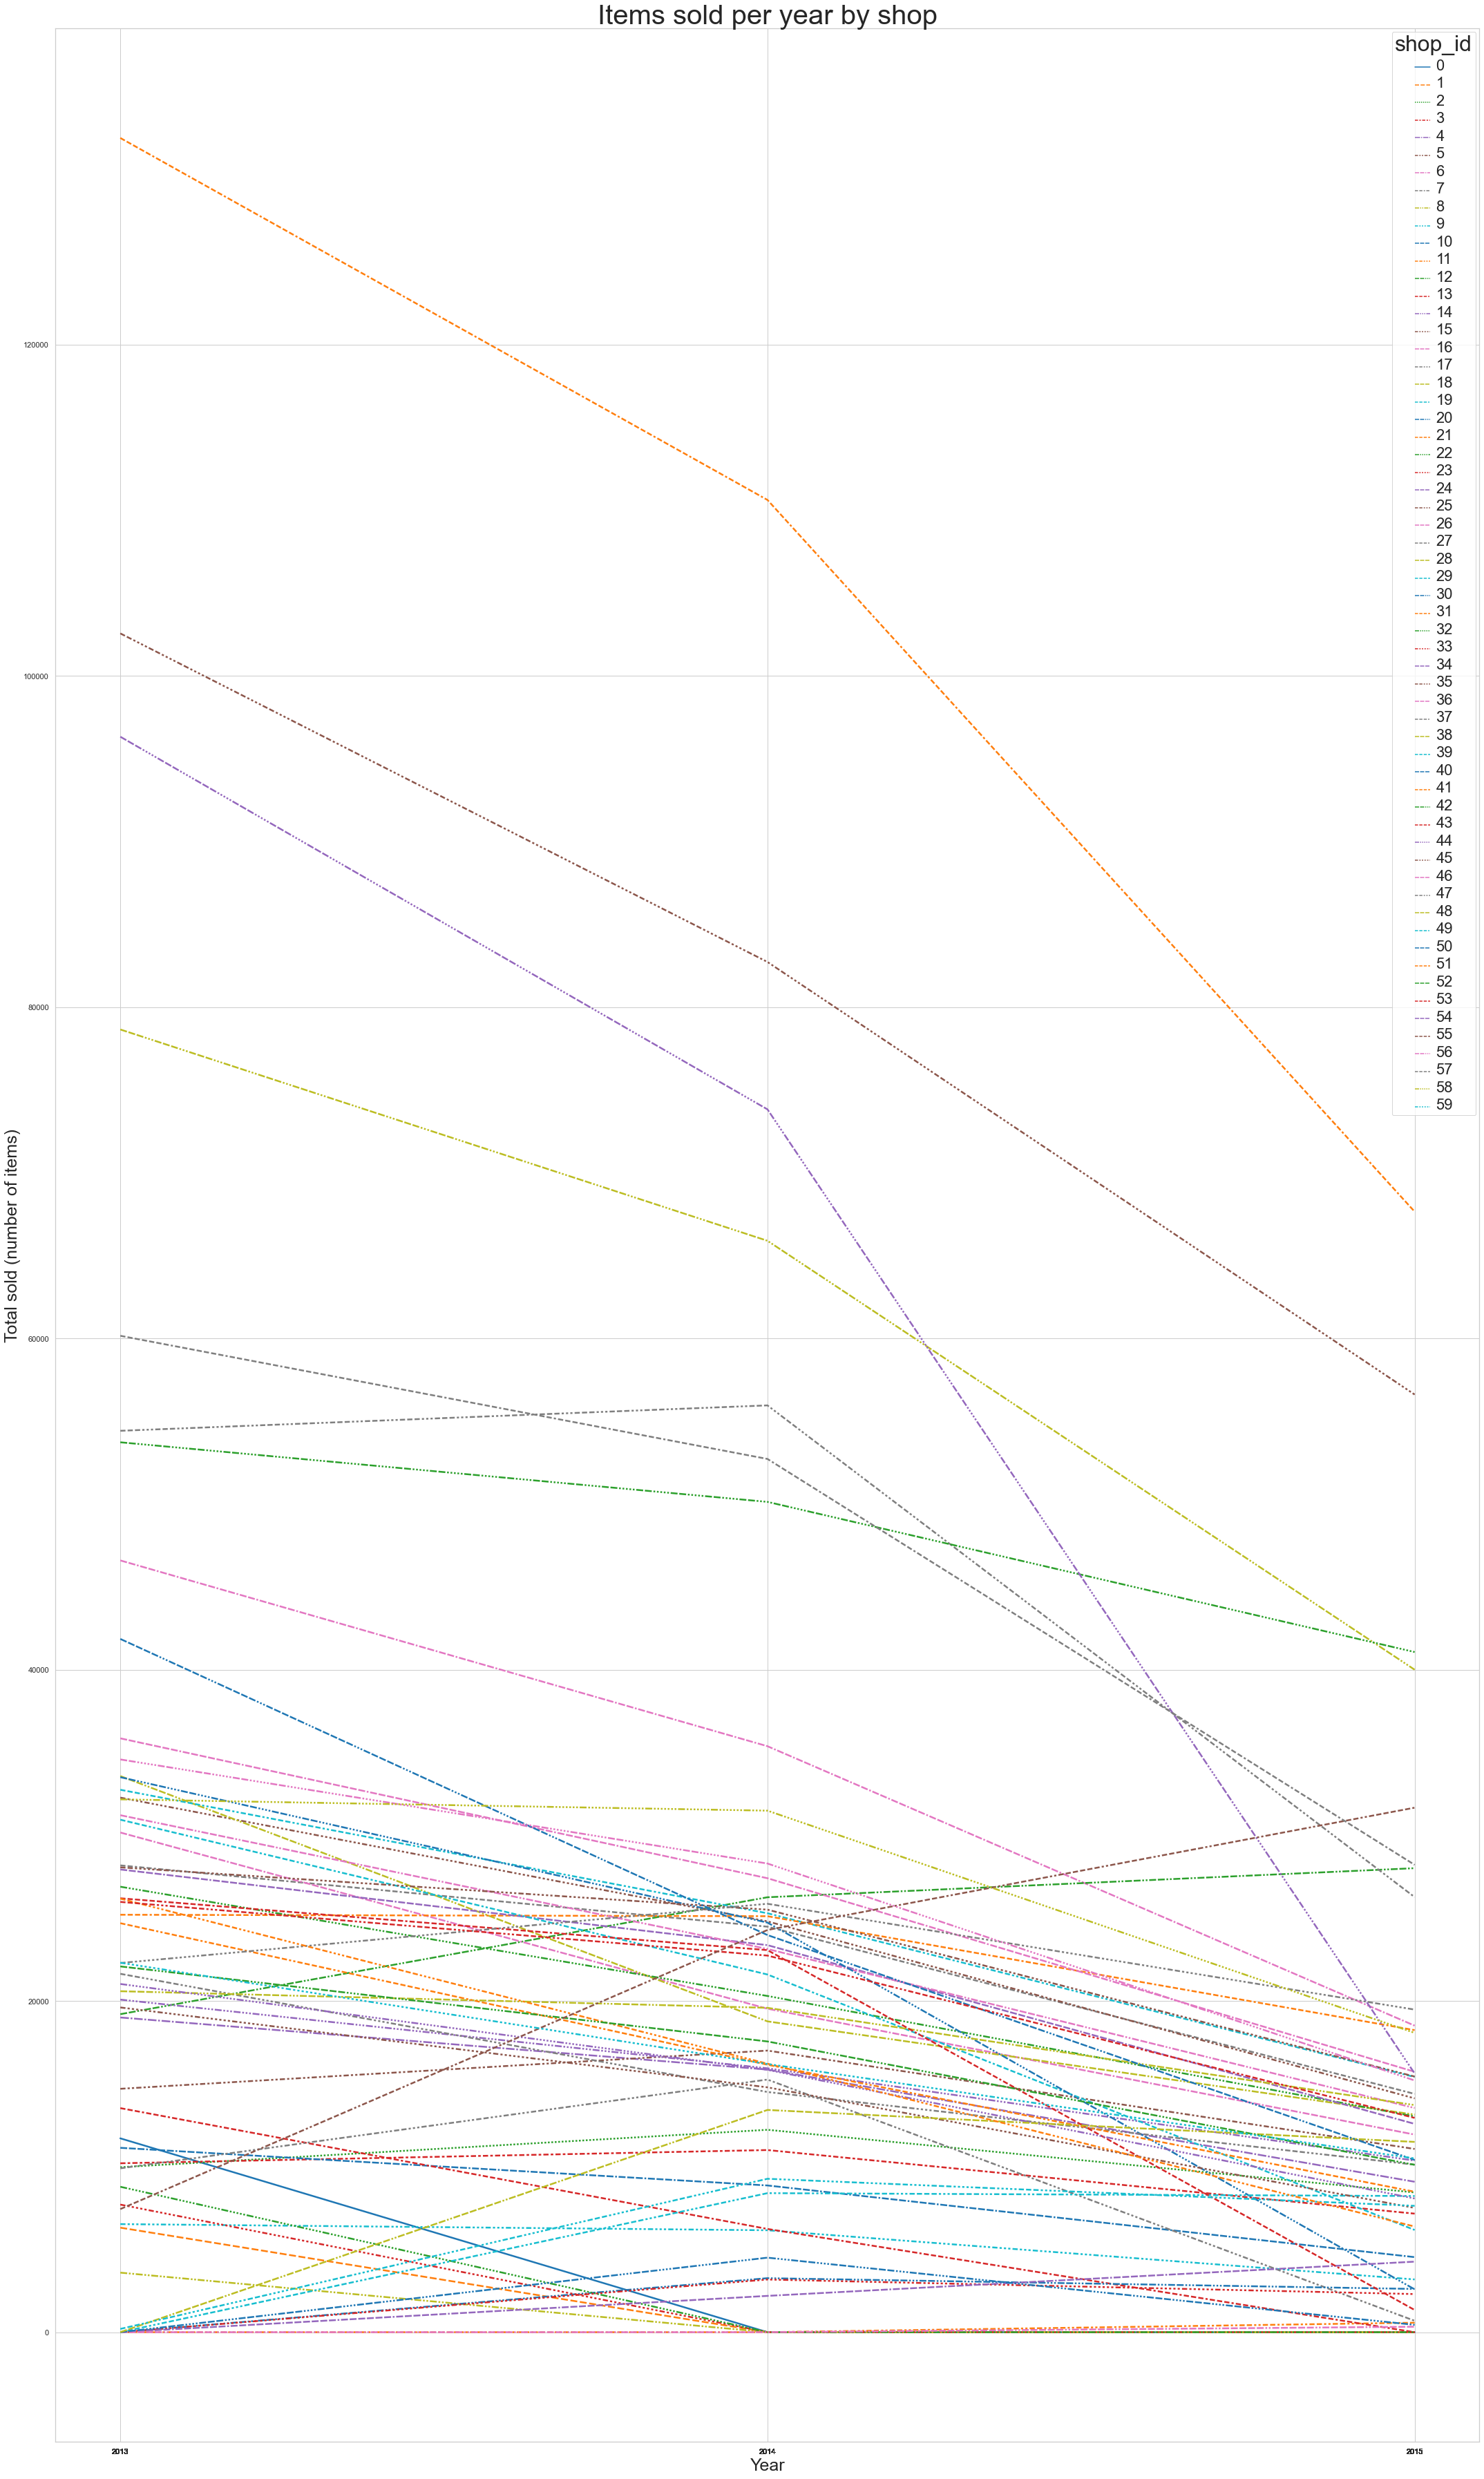

In [157]:
draw_it(items_sold_year_2, 'date', 'item_cnt_day', 'Year', 'Items sold per year by shop', 'shop_id')

In [71]:
categories_shop = train_complete.groupby(['shop_id'], as_index = False).item_category_id.nunique()

fig, ax = plt.subplots(figsize = (30, 10))

ax = sns.barplot(
    data = categories_shop,
    x = 'shop_id',
    y = 'item_category_id')

ax.set_xlabel('Shop', fontsize=25)
ax.set_ylabel('Total categories', fontsize=25)
ax.set_title('Categories per shop', fontsize = 40)
ax.set_yticks(np.linspace(0, categories_shop['item_category_id'].max(), 20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()
plt.close()


In [ ]:
categories_item = train_complete.groupby(['item_category_id'], as_index = False).item_id.nunique()

fig, ax = plt.subplots(figsize = (30, 50))

ax = sns.barplot(
    data = categories_item,
    x = 'item_category_id',
    y = 'item_id')

ax.set_xlabel('Category', fontsize=25)
ax.set_ylabel('Total items', fontsize=25)
ax.set_title('Items per category', fontsize = 40)
ax.set_yticks(np.linspace(0, categories_item['item_id'].max(), 20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()
plt.close()

#### Items sold per category | Year & Month

##### By month

In [ ]:
items_sold_month_category = train_complete.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_month_category)

draw_it(items_sold_month_category, 'date_block_num', 'item_cnt_day', 'Month', 'Items sold per month by category', 'item_category_id')


Let's complete the dataframe with unexisted values

In [ ]:
items_sold_month_category2 = fill_empty_dates(items_sold_month_category, 'item_category_id', 'date_block_num')

items_sold_month_category2.head(10)

In [ ]:
draw_it(items_sold_month_category2, 'date_block_num', 'item_cnt_day', 'Month', 'Items sold per month by category', 'item_category_id')

##### By year

In [ ]:
items_sold_year_category = train_complete.groupby([train_complete['date'].dt.year, 'item_category_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_year_category.head(10))

draw_it(items_sold_year_category, 'date', 'item_cnt_day', 'Year', 'Items sold per year by category', 'item_category_id')

Filling missed values

In [92]:
items_sold_year_category2 = fill_empty_dates(items_sold_year_category, 'item_category_id', 'date')
items_sold_year_category2.head(10)

date  item_category_id  item_cnt_day
0  2013                 0           3.0
1  2013                 1           2.0
2  2013                 2       11339.0
3  2013                 3        6588.0
4  2013                 4        1897.0
5  2013                 5        4325.0
6  2013                 6        8674.0
7  2013                 9        2815.0
8  2013                10           1.0
9  2013                11        3962.0

In [ ]:
draw_it(items_sold_year_category2, 'date', 'item_cnt_day', 'Year', 'Items sold per year by category', 'item_category_id')

#### Top 10 items sold | Year & Month

##### By month

In [ ]:
items_sold_month_total = train_complete.groupby(['date_block_num', 'item_id']).agg({'item_cnt_day': 'sum'}).sort_values(by=['item_cnt_day'], ascending=False).reset_index()

items_sold_month_total_10 = pd.merge(sortby_nitems[['item_id']], items_sold_month_total[['item_id', 'item_cnt_day','date_block_num']], how = 'left', on = 'item_id')
display(items_sold_month_total_10)

draw_it(items_sold_month_total_10, 'date_block_num', 'item_cnt_day', 'Month', 'Total number of items sold per month ', 'item_id')

Filling empty values

In [ ]:
items_sold_month_total_2 = fill_empty_dates(items_sold_month_total_10, 'item_id', 'date_block_num')
items_sold_month_total2.head(10)

In [ ]:
draw_it(items_sold_month_total_2, 'date_block_num', 'item_cnt_day', 'Month', 'Total number of items sold per month ', 'item_id')

##### By year

date  item_category_id  item_cnt_day
0    2013                 0           3.0
1    2013                 1           2.0
2    2013                 2       11339.0
3    2013                 3        6588.0
4    2013                 4        1897.0
..    ...               ...           ...
211  2015                79        7268.0
212  2015                80        6136.0
213  2015                81           1.0
214  2015                82          50.0
215  2015                83        3511.0

[216 rows x 3 columns]

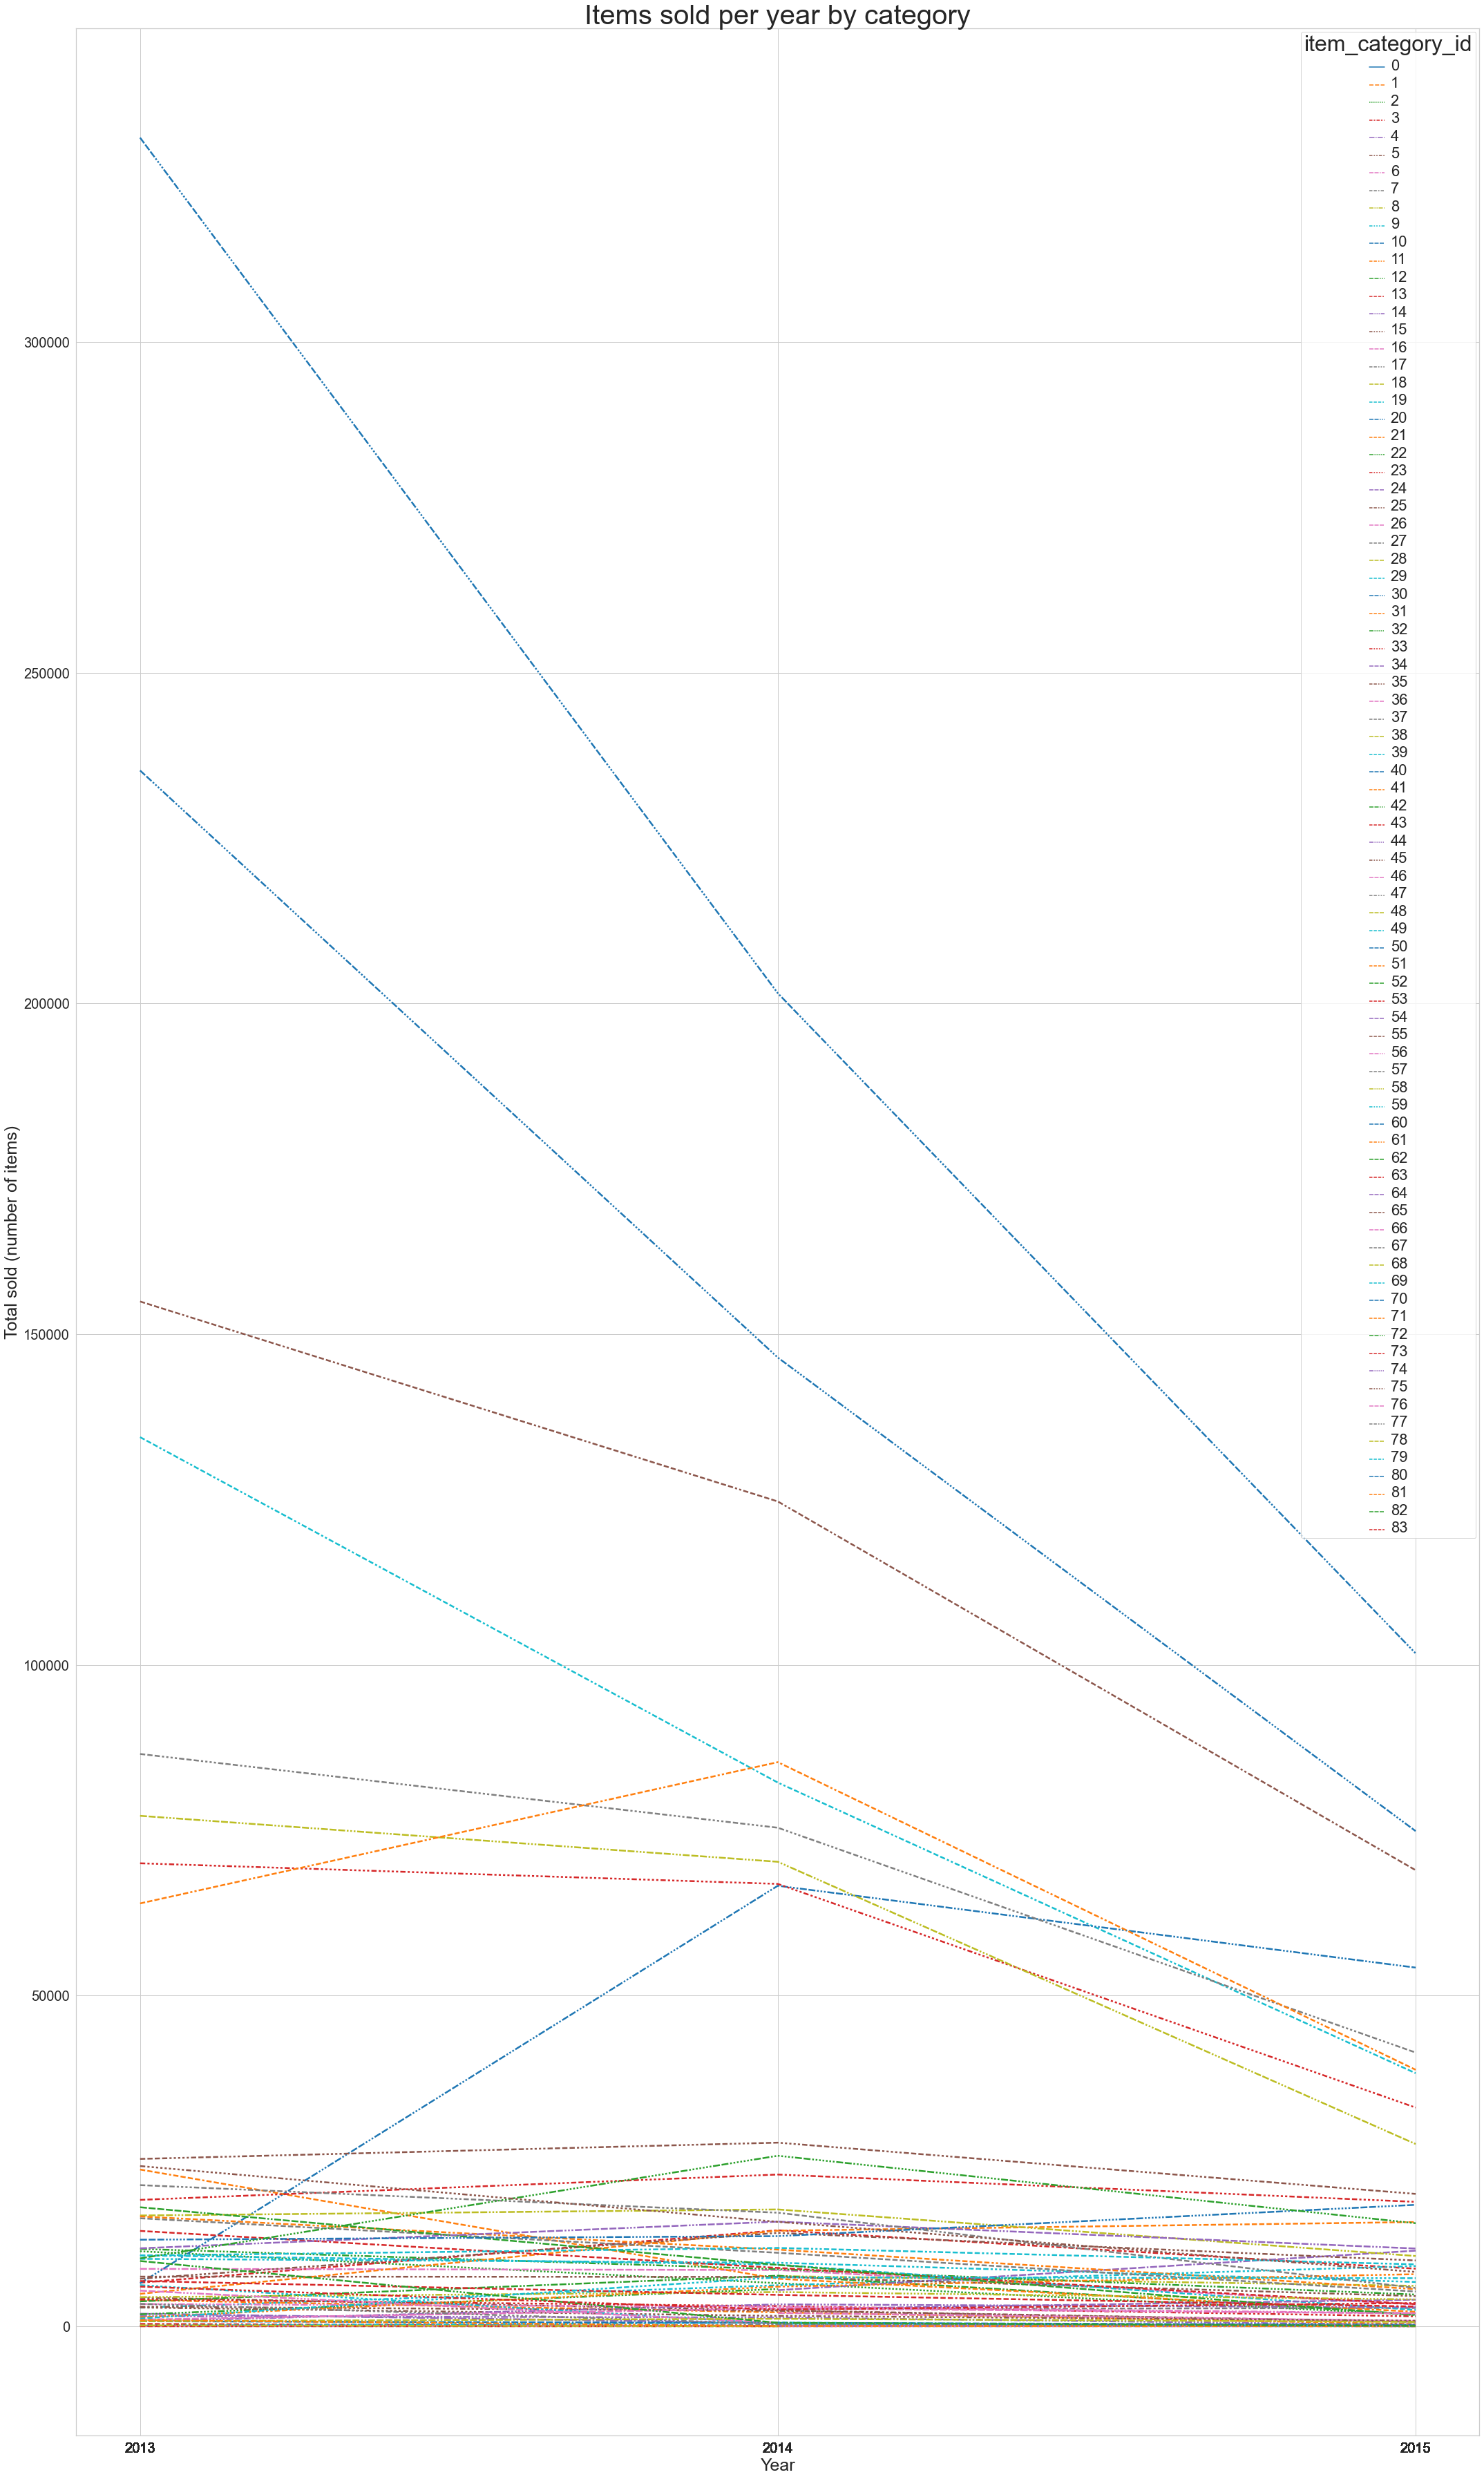

In [31]:
#By year
items_sold_year_category = train_complete.groupby([train_complete['date'].dt.year, 'item_category_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_year_category)

fig, ax = plt.subplots(figsize = (30, 50))

ax= sns.lineplot(
    data=items_sold_year_category,
    palette='tab10',
    x = 'date',
    y = 'item_cnt_day',
    hue = 'item_category_id',
    style = 'item_category_id',
    linewidth=2.5)

ax.set_xlabel('Year', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per year by category', fontsize = 40)
ax.set_xticks(items_sold_year_category.date.values)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='32')

fig.tight_layout()
plt.show()
plt.close()

## <center> Predictions <center>

### Total sales

#### Year

#### Month

### Sales by shop

#### Year

#### Month

### Sales by category

#### Year

#### Month

### Sales by item

#### Year

#### Month